<a href="https://colab.research.google.com/github/TurkuNLP/intro-to-nlp/blob/master/intro_2023_exercise_2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise task 2: visualization of textual data (solution)

This notebook shows an example solution for exercise 2.

---

## Load and read JSONL files

First, load the files from the URLs given in the exercise to the local drive using [`wget`](https://en.wikipedia.org/wiki/Wget).

In [5]:
!wget -nc --quiet http://dl.turkunlp.org/TKO_7095_2023/topic1.jsonl
!wget -nc --quiet http://dl.turkunlp.org/TKO_7095_2023/topic2.jsonl

Next, write a function to read the [JSONL](https://jsonlines.org/) format into a list of Python dictionary objects and return that list.

In [10]:
import json


def load_jsonl(path):
  data = []
  with open(path) as f:
    for l in f:
      d = json.loads(l)
      data.append(d)
  return data

Use this function to read the JSONL data from disk into Python as lists of dictionaries.

In [13]:
topic1_data = load_jsonl('topic1.jsonl')
topic2_data = load_jsonl('topic2.jsonl')

Print a few of the first rows of data for both:

In [14]:
for d in topic1_data[:5]:
  print(d)

print('---')

for d in topic2_data[:5]:
  print(d)

{'text': 'Helsingin Sanomat reports that  Finland only has about between 10 and 20 toy stores left  after the  sudden bankruptcy and closure of the BR and Toys \'R\' Us chains  at the end of 2018. \n The toy industry association Leluyhdistys tells the paper that the wholesale trade in toys grew by 11.7 percent in 2017, but that most of the toys sold in Finland today aren\'t sold in dedicated toy stores, but in large supermarkets and the like. The owner of the Prisma chain of big box stores, S-Group, says its toy sales have fallen by a few percentage points every year. \n S-Group\'s  Emilia Lehtonen  tells HS that the reason for flagging sales is the "changing nature of play. Children are switching to mobile and computer games at younger and younger ages." \n Kesko representative  Hannele Åberg  tells the paper that sales of toys have grown in the last few years in K-Citymarket locations. \n "At first, when the electronic games and digitalization hit, it hit toy sales very hard. But toy

---

## Plotting a word cloud

In [15]:
!pip install --quiet wordcloud 

Here's a small support function that uses the [`wordcloud`](https://pypi.org/project/wordcloud/) and [`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) libraries to show a word cloud for a given text string. (You don't need to understand this is any detail, you can just use it as-is for visualization.)

In [16]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud


def show_word_cloud(text):
  cloud = WordCloud(width=1000, height=1000, background_color='white')
  cloud = cloud.generate(text)
  plt.figure(figsize=(10,10))
  plt.imshow(cloud)
  plt.axis('off')

The `show_word_cloud` function expects a single string as input, but our data consists of lists of dictionaries, each containing text strings keyed by `'text'`. Let's write a small support function that catenates those into a single long string.

In [17]:
def catenate_texts(data):
  texts = []
  for item in data:
    texts.append(item['text'])
  return ' '.join(texts)

Try that out

In [21]:
print(catenate_texts(topic1_data)[:5000])

Helsingin Sanomat reports that  Finland only has about between 10 and 20 toy stores left  after the  sudden bankruptcy and closure of the BR and Toys 'R' Us chains  at the end of 2018. 
 The toy industry association Leluyhdistys tells the paper that the wholesale trade in toys grew by 11.7 percent in 2017, but that most of the toys sold in Finland today aren't sold in dedicated toy stores, but in large supermarkets and the like. The owner of the Prisma chain of big box stores, S-Group, says its toy sales have fallen by a few percentage points every year. 
 S-Group's  Emilia Lehtonen  tells HS that the reason for flagging sales is the "changing nature of play. Children are switching to mobile and computer games at younger and younger ages." 
 Kesko representative  Hannele Åberg  tells the paper that sales of toys have grown in the last few years in K-Citymarket locations. 
 "At first, when the electronic games and digitalization hit, it hit toy sales very hard. But toys have made a good

Now use that function to create a single long string with all of the text in `topic1_data` and `topic2_data` and plot word clouds for each.

In [22]:
topic1_text = catenate_texts(topic1_data)
topic2_text = catenate_texts(topic2_data)

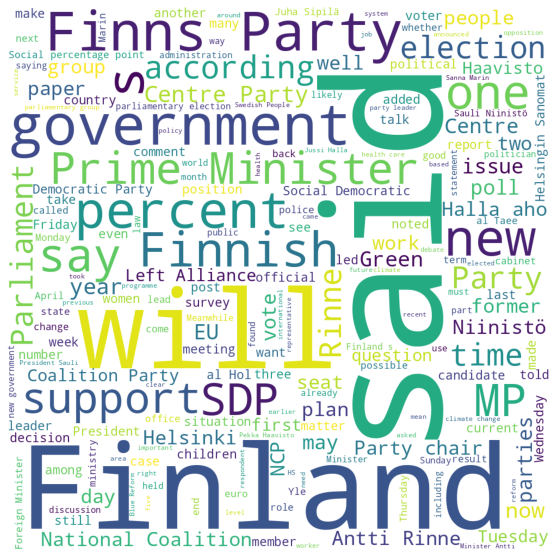

In [23]:
show_word_cloud(topic1_text)

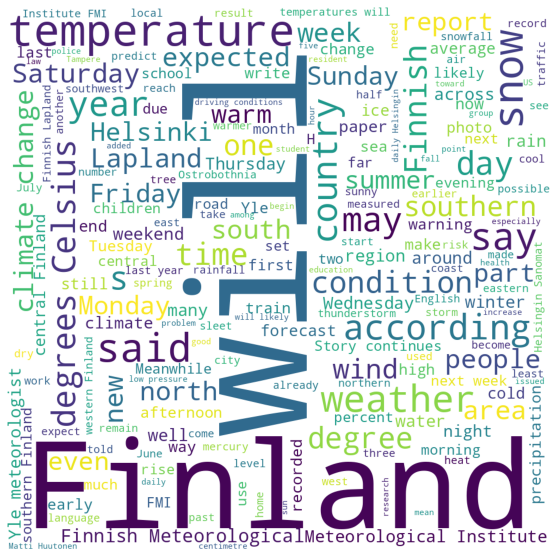

In [24]:
show_word_cloud(topic2_text)

There's a fair bit of noise in both: for example, common words like "said" and "will" show up quite large, but we can pick out the likely topics:

* topic1: Finnish politics
* topic2 Finnish weather